<a href="https://colab.research.google.com/github/rameenhamad/Developer_HUB_ML_Tasks/blob/main/2_Cancer_Detection_Histopathological_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

import matplotlib.pyplot as plt

DataSet

In [ ]:
dataset = "/content/drive/MyDrive/Developer_HUB_ML_Tasks/Cancer_Histopathological"
train_dataset = os.path.join(dataset, "train")
test_dataset = os.path.join(dataset, "test")


Resizing + Normalization(Preprocessing)

In [ ]:
ImageSize = (128,128)
BatchSize = 32

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = 0.2,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
  train_dataset,
  target_size=ImageSize,
  batch_size=BatchSize,
  class_mode='binary',
  subset='training'
)

val_generator = train_datagen.flow_from_directory(
  train_dataset,
  target_size=ImageSize,
  batch_size=BatchSize,
  class_mode='binary',
  subset='validation'
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
  test_dataset,
  target_size=ImageSize,
  batch_size=BatchSize,
  class_mode='binary'
)

print("classes: ", train_generator.class_indices)

Found 919 images belonging to 2 classes.
Found 229 images belonging to 2 classes.
Found 545 images belonging to 2 classes.
classes:  {'benign': 0, 'malignant': 1}


inside the dataSet

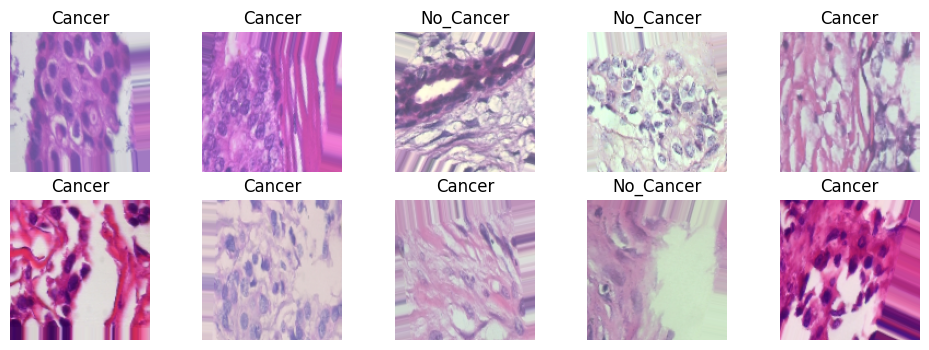

In [ ]:
def plot_images(generator):
  images,labels = next(generator)
  plt.figure(figsize=(12,4))
  for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(images[i])
    plt.title("Cancer" if labels[i] == 1 else "No_Cancer")
    plt.axis("off")
  plt.show()

plot_images(train_generator)

Building model with 3 convo layers

In [ ]:
model = Sequential([
    Input(shape=(128,128,3)),
    Conv2D(16, (3,3), activation="relu"),
    MaxPooling2D(),

    Conv2D(32, (3,3), activation="relu"),
    MaxPooling2D(),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D((3,3)),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 9, 9, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5184)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       663,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 687,393 (2.62 MB)

 Trainable params: 687,393 (2.62 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer = "adam", loss="binary_crossentropy", metrics=["accuracy"]
)

In [ ]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    verbose=2,
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
29/29 - 161s - 6s/step - accuracy: 0.6659 - loss: 0.6564 - val_accuracy: 0.6769 - val_loss: 0.5819
Epoch 2/10
29/29 - 35s - 1s/step - accuracy: 0.6801 - loss: 0.5606 - val_accuracy: 0.6987 - val_loss: 0.4992
Epoch 3/10
29/29 - 41s - 1s/step - accuracy: 0.7356 - loss: 0.5340 - val_accuracy: 0.7031 - val_loss: 0.4760
Epoch 4/10
29/29 - 36s - 1s/step - accuracy: 0.7802 - loss: 0.5100 - val_accuracy: 0.7729 - val_loss: 0.4571
Epoch 5/10
29/29 - 40s - 1s/step - accuracy: 0.8020 - loss: 0.5067 - val_accuracy: 0.7293 - val_loss: 0.4666
Epoch 6/10
29/29 - 35s - 1s/step - accuracy: 0.8020 - loss: 0.4942 - val_accuracy: 0.7555 - val_loss: 0.4852
Epoch 7/10
29/29 - 36s - 1s/step - accuracy: 0.8215 - loss: 0.4796 - val_accuracy: 0.8210 - val_loss: 0.4178
Epoch 8/10
29/29 - 35s - 1s/step - accuracy: 0.8444 - loss: 0.4283 - val_accuracy: 0.7205 - val_loss: 0.5151
Epoch 9/10
29/29 - 36s - 1s/step - accuracy: 0.8215 - loss: 0.4546 - val_accuracy: 0.8297 - val_loss: 0.4189
Epoch 10/10
29/29 

Evaluating Test_data

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)

print(f"Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")

18/18 ━━━━━━━━━━━━━━━━━━━━ 191s 11s/step - accuracy: 0.8005 - loss: 0.4996
Test Accuracy: 0.8294, Test Loss: 0.4415


Accuracy / Loss plot

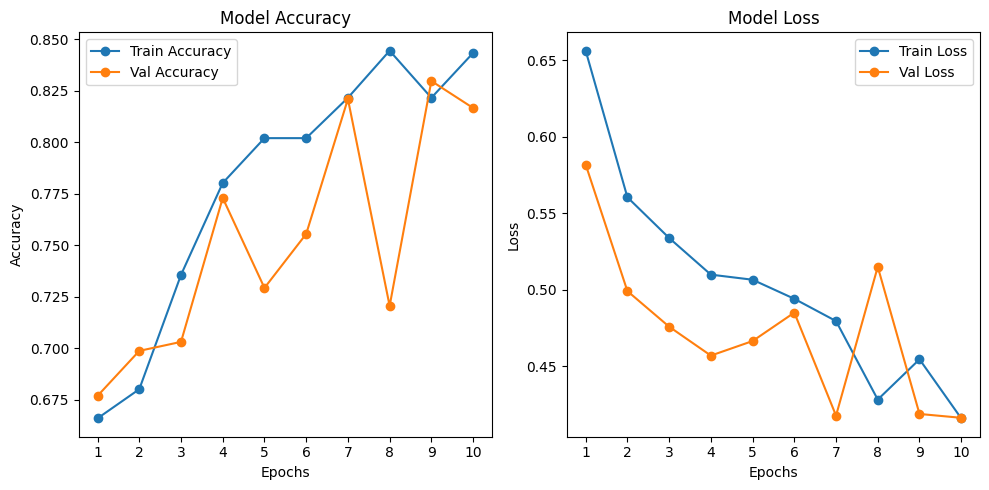

In [ ]:
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))

    epochs = range(1, len(history.history['accuracy']) + 1)

    # Accuracy subplot
    ax1.plot(epochs, history.history['accuracy'], label='Train Accuracy', marker='o')
    ax1.plot(epochs, history.history['val_accuracy'], label='Val Accuracy', marker='o')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.set_xticks(epochs)
    ax1.legend()

    # Loss subplot
    ax2.plot(epochs, history.history['loss'], label='Train Loss', marker='o')
    ax2.plot(epochs, history.history['val_loss'], label='Val Loss', marker='o')
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.set_xticks(epochs)
    ax2.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

##**Quick Observations**

####**Accuracy and Loss Behavior:**

**Training accuracy:** starts around 0.66 and steadily increases to ~0.84.

**Validation accuracy:** fluctuates between 0.67 and 0.82, showing some inconsistency.

**Training loss:** decreases steadily from 0.65 to 0.41, indicating effective learning.

**Validation loss:** initially decreases but then fluctuates between 0.41 and 0.51, reflecting minor instability.

**Test accuracy:** 0.8294

**Test loss:** 0.4415

**Insights:**
- The model is learning meaningful patterns, as seen in the rising training accuracy and decreasing training loss.
- Fluctuations in validation metrics hint at slight overfitting, likely due to a small dataset.
- Test performance (accuracy ~0.83, loss ~0.44) indicates the model generalizes reasonably well to unseen data.

Transfer Learning with VGG16

In [ ]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128,128,3))
base_model.trainable = False

transfer_model = Sequential([
    base_model,

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

transfer_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │       524,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,239,105 (58.13 MB)

 Trainable params: 524,417 (2.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
transfer_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [18]:
transfer_history = transfer_model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    verbose=2
)

Epoch 1/10
29/29 - 221s - 8s/step - accuracy: 0.6551 - loss: 0.7218 - val_accuracy: 0.6157 - val_loss: 0.6728
Epoch 2/10
29/29 - 254s - 9s/step - accuracy: 0.7106 - loss: 0.5403 - val_accuracy: 0.6376 - val_loss: 0.6874
Epoch 3/10
29/29 - 257s - 9s/step - accuracy: 0.7595 - loss: 0.4897 - val_accuracy: 0.6638 - val_loss: 0.6661
Epoch 4/10
29/29 - 211s - 7s/step - accuracy: 0.7280 - loss: 0.4987 - val_accuracy: 0.6463 - val_loss: 0.6790
Epoch 5/10
29/29 - 213s - 7s/step - accuracy: 0.7922 - loss: 0.4598 - val_accuracy: 0.6288 - val_loss: 0.6914
Epoch 6/10
29/29 - 212s - 7s/step - accuracy: 0.7726 - loss: 0.4684 - val_accuracy: 0.6550 - val_loss: 0.6547
Epoch 7/10
29/29 - 213s - 7s/step - accuracy: 0.7965 - loss: 0.4483 - val_accuracy: 0.6245 - val_loss: 0.6838
Epoch 8/10
29/29 - 251s - 9s/step - accuracy: 0.7835 - loss: 0.4567 - val_accuracy: 0.6856 - val_loss: 0.6493
Epoch 9/10
29/29 - 212s - 7s/step - accuracy: 0.7922 - loss: 0.4507 - val_accuracy: 0.7118 - val_loss: 0.6268
Epoch 10/1

Evaluating Test_data

In [20]:
tr_test_loss, tr_test_accuracy = transfer_model.evaluate(test_generator, verbose=0)

print(f"Test Accuracy: {tr_test_accuracy:.4f}, Test Loss: {tr_test_loss:.4f}")

Test Accuracy: 0.7872, Test Loss: 0.4618


plot for transfer model accuracy / loss

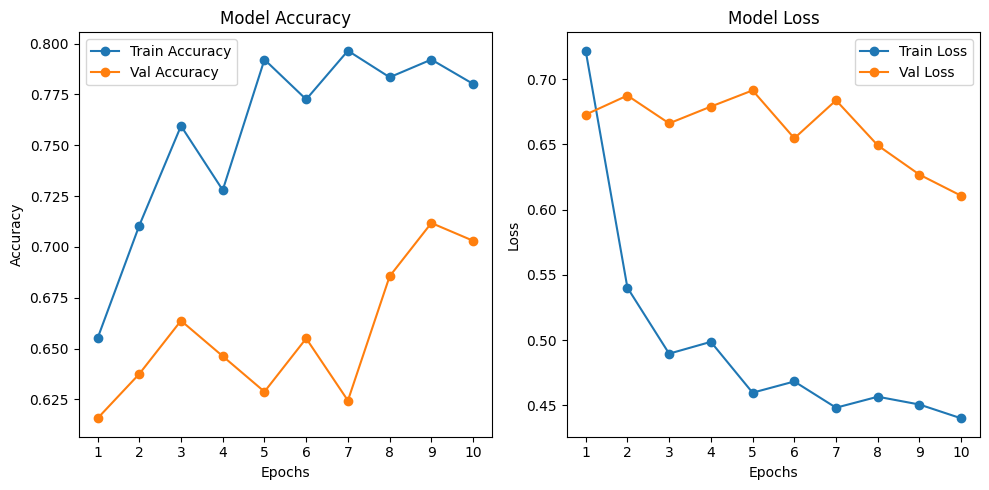

In [21]:
def plot_training_history(transfer_history):
    # Create a figure with 2 subplots: accuracy and loss
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

    epochs = range(1, len(transfer_history.history['accuracy']) + 1)

    # Accuracy subplot
    ax1.plot(epochs, transfer_history.history['accuracy'], label='Train Accuracy', marker='o')
    ax1.plot(epochs, transfer_history.history['val_accuracy'], label='Val Accuracy', marker='o')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.set_xticks(epochs)
    ax1.legend()

    # Loss subplot
    ax2.plot(epochs, transfer_history.history['loss'], label='Train Loss', marker='o')
    ax2.plot(epochs, transfer_history.history['val_loss'], label='Val Loss', marker='o')
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.set_xticks(epochs)
    ax2.legend()

    plt.tight_layout()
    plt.show()

# Usage
plot_training_history(transfer_history)

##**Observations**

**Training accuracy:**
Starts at 55% → improves to 87.1% → your model is learning features.

**Training loss:**
Drops from 0.9173 → 0.3075 → consistent improvement.

**Validation accuracy:**
Fluctuates around 50–64% → not improving as much as training accuracy.

- This is a sign of overfitting: model memorizes training data but doesn’t generalize well.

**Validation loss:**
Fluctuates around 0.68–0.89 → confirms instability / overfitting.

**Why this happens with VGG16**
- VGG16 is very deep → lots of parameters (~138M in full model).
- Your dataset is small (~500–1000 images) → not enough to train such a big model from scratch.
- Even if freeze convolutional layers and only train dense layers, overfitting can still happen.

##Final Thoughts